In [235]:
%matplotlib inline
import numpy as np
import scipy
import scipy.io as sio
import os
import copy
from keras.callbacks import EarlyStopping
from scipy.misc import imsave
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#MORE NODES
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(128, 128, 1)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
test = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(test)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

sr_encoder = Model(input_img, decoded)
sr_encoder.compile(optimizer='adadelta', loss='binary_crossentropy')

enc = Model(input_img, encoded)
test = Model(input_img, test)



In [ ]:
#LOW NODES TO INVESTIGATE RESOLUTION
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(128, 128, 1)) 

x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded_low = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_low)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
#x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_low = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

sr_encoder_lownodes = Model(input_img, decoded_low)
sr_encoder_lownodes.compile(optimizer='adadelta', loss='binary_crossentropy')


In [ ]:
dirstr = '/home/ericbarnhill/Documents/MATLAB/ericbarnhill/projects/2017-11-21-ml-7t/'
os.chdir(dirstr)
os.listdir()

In [ ]:
all_slcs_mat = sio.loadmat('all_slices.mat')
all_slcs = all_slcs_mat['all_slices']
print(all_slcs.shape)

In [ ]:
all_slcs_r = np.real(copy.deepcopy(all_slcs))

In [ ]:
print(np.max(all_slcs_r[:,:,0]))
print(np.min(all_slcs_r[:,:,0]))

In [ ]:
print(np.max(all_slcs_r[:,:,0]))
print(np.min(all_slcs_r[:,:,0]))

In [ ]:
def normalize(array):
    mn = np.min(array)
    mx = np.max(array)
    array = (array - mn) / mx - mn
    return array

In [ ]:
def normalize_slicewise(arr):
    shp = arr.shape
    for n in range(shp[2]):
        slc = arr[:,:,n]
        mn = np.min(slc)
        mx = np.max(slc)
        slc = (slc - mn) / (mx - mn)
        arr[:,:,n] = slc
    return arr

In [ ]:
all_slcs_dup = copy.deepcopy(all_slcs_r)
all_slcs_norm = normalize_slicewise(all_slcs_dup)

In [ ]:
all_slcs_norm = np.moveaxis(all_slcs_norm, [0,1,2], [-2,-1,-3])
print(all_slcs_norm.shape)

In [ ]:
all_slcs_pad = np.zeros((15120, 128, 128))
all_slcs_pad = all_slcs_pad.reshape(15120, 128, 128, 1)
all_slcs_pad[:, 5:89, 5:105, :] = all_slcs_norm

In [ ]:
all_slcs_norm = all_slcs_norm.reshape(15120, 84, 100, 1)

In [ ]:
# autoencode
sr_encoder.fit(all_slcs_pad, all_slcs_pad,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_split=0.3,
                callbacks=[EarlyStopping(patience=2)])

In [ ]:
# autoencode
sr_encoder_lownodes.fit(all_slcs_pad, all_slcs_pad,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_split=0.3,
                callbacks=[EarlyStopping(patience=2)])

In [ ]:
ex_pred = sr_encoder.predict(all_slcs_pad[0:1,:,:])

In [ ]:
ex_pred_low = sr_encoder_lownodes.predict(all_slcs_pad[0:10,:,:])

In [ ]:
ex_pred.shape

In [ ]:
sio.savemat('auto_pred.mat', {'pred':ex_pred, 'orig': all_slcs_pad[0:100,:,:]})

In [ ]:
l = sr_encoder.layers
len(l)
last_conv = l[19]
print(last_conv)
weights = last_conv.get_weights()
weights[1]

In [ ]:
test_pred = test.predict(all_slcs_pad[0:1,:,:])
sio.savemat('test_pred.mat', {'test_pred': test_pred})

In [ ]:
sio.savemat('pred_low.mat', {'pred_low': ex_pred_low})

In [239]:
op1 = sr_encoder.layers[6].output
input_img = sr_encoder.input
print(op1.shape)
filter_index = 1
loss = K.mean(op1[:, :, :, filter_index])
print(loss.shape)
# compute the gradient of the input picture wrt this loss
#grads = replace_none_with_zero(K.gradients(loss, input_img))


(?, 32, 32, 16)
()


In [238]:
grads = K.gradients(loss, input_img)[0]
print(grads)

Tensor("gradients_26/conv2d_66/convolution_grad/Conv2DBackpropInput:0", shape=(?, 128, 128, 1), dtype=float32)


In [231]:
# normalization trick: we normalize the gradient
#grads = np.int32(0)
#grads /= (K.sqrt(K.mean(K.square(grads))))

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])


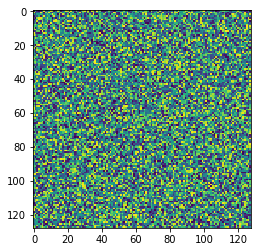

In [275]:
import numpy as np

img_width = 128
img_height = 128
step = 100000
# we start from a gray image with some noise
input_img_data = np.random.random((1, img_width, img_height, 1))
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    #print(loss_value*step)
    #print(grads_value*step)
    input_img_data += grads_value * step
    
img = input_img_data[0,:,:,0]
img = deprocess_image(img)
img.shape
imgplot2 = plt.imshow(input_img_data[0,:,:,0])


In [224]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    return x

In [ ]:
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)
def replace_none_with_zero(l):
  return [np.int32(0) if i==None else i for i in l] 

In [276]:
num_layers = len(sr_encoder.layers)
final_filts = np.zeros((128, 128, num_layers))
for n in range(1,num_layers-1):
    op1 = sr_encoder.layers[n].output
    filter_index = 1
    loss = K.mean(op1[:, :, :, filter_index])
    grads = K.gradients(loss, input_img)[0]
    iterate = K.function([input_img], [loss, grads])
    input_img_data = np.random.random((1, img_width, img_height, 1))
    # run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0,:,:,0]
    final_filts[:,:,n] = deprocess_image(img)


In [277]:
sio.savemat('final_filts.mat', {'filts':final_filts})